In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
matches = pd.read_csv(r'D:\Data Science\IPL\Dataset\matches.csv')


In [3]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
deliveries = pd.read_csv(r'D:\Data Science\IPL\Dataset\deliveries.csv')


In [5]:
deliveries.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [6]:
auction = pd.read_csv(r'D:\Data Science\IPL\Dataset\IPLPlayerAuctionData.csv')


In [7]:
auction.head()

,Player,Role,Amount,Team,Year,Player Origin
0,Aaron Finch,Batsman,40000000,Sunrisers Hyderabad,2014.0,Overseas
1,Aaron Finch,Batsman,32000000,Mumbai Indians,2015.0,Overseas
2,Aaron Finch,Batsman,10000000,Gujarat Lions,2016.0,Overseas
3,Aaron Finch,Batsman,62000000,Kings XI Punjab,2018.0,Overseas
4,Aaron Finch,Batsman,44000000,Royal Challengers Bangalore,2020.0,Overseas


In [8]:
print(auction.columns)  # Check actual column names

Index(['Player', 'Role', 'Amount', 'Team', 'Year', 'Player Origin'], dtype='object')


In [9]:
print(matches.columns)  # Check actual column names

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')


In [10]:
print(deliveries.columns)  # Check actual column names

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')


In [11]:
auction = auction[['Player', 'Amount', 'Team', 'Year']].copy()


In [12]:
auction['Player'] = auction['Player'].str.strip().str.lower()


In [13]:
auction['Amount'] = (auction['Amount']
                    .replace('[\₹,\s]', '', regex=True)
                    .astype(float))



In [15]:
for col in ['batsman', 'bowler', 'dismissal_kind']:
    deliveries[col] = deliveries[col].str.strip().str.lower()



In [16]:
batting_perf = (
    deliveries
    .groupby('batsman')['batsman_runs']
    .sum()
    .reset_index()
    .rename(columns={'batsman': 'Player', 'batsman_runs': 'Runs'})
)



In [17]:
batting_df = auction.merge(batting_perf, on='Player', how='left')


In [18]:
batting_df['Runs'] = batting_df['Runs'].fillna(0)


In [20]:
print("Correlation – Amount vs Runs:", 
      batting_df['Amount'].corr(batting_df['Runs']))

Correlation – Amount vs Runs: 0.1673532251294871


In [21]:
plt.figure(figsize=(14, 6))


<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0.5, 1.0, 'Auction Amount vs Runs')

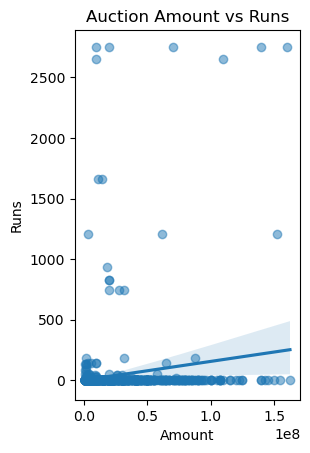

In [22]:
plt.subplot(1, 2, 1)
sns.regplot(data=batting_df, x='Amount', y='Runs', scatter_kws={'alpha':0.5})
plt.title('Auction Amount vs Runs')



In [23]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [24]:
all_teams = sorted(set(matches['team1']).union(matches['team2']))
print("All Teams:", all_teams)


All Teams: ['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiant', 'Rising Pune Supergiants', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']


eliminator
N    799
Y     13
Name: count, dtype: int64


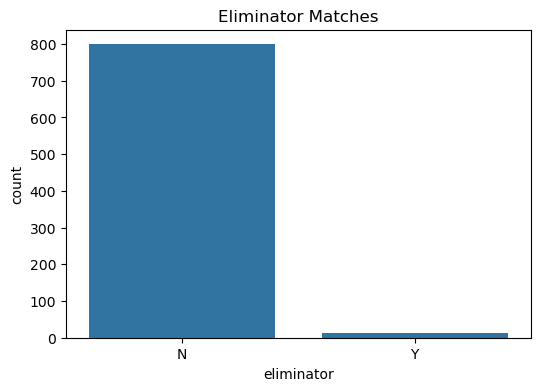

In [25]:
print(matches['eliminator'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='eliminator', data=matches)
plt.title('Eliminator Matches')
plt.show()


C:\Users\chinm\AppData\Local\Temp\ipykernel_23244\696802670.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


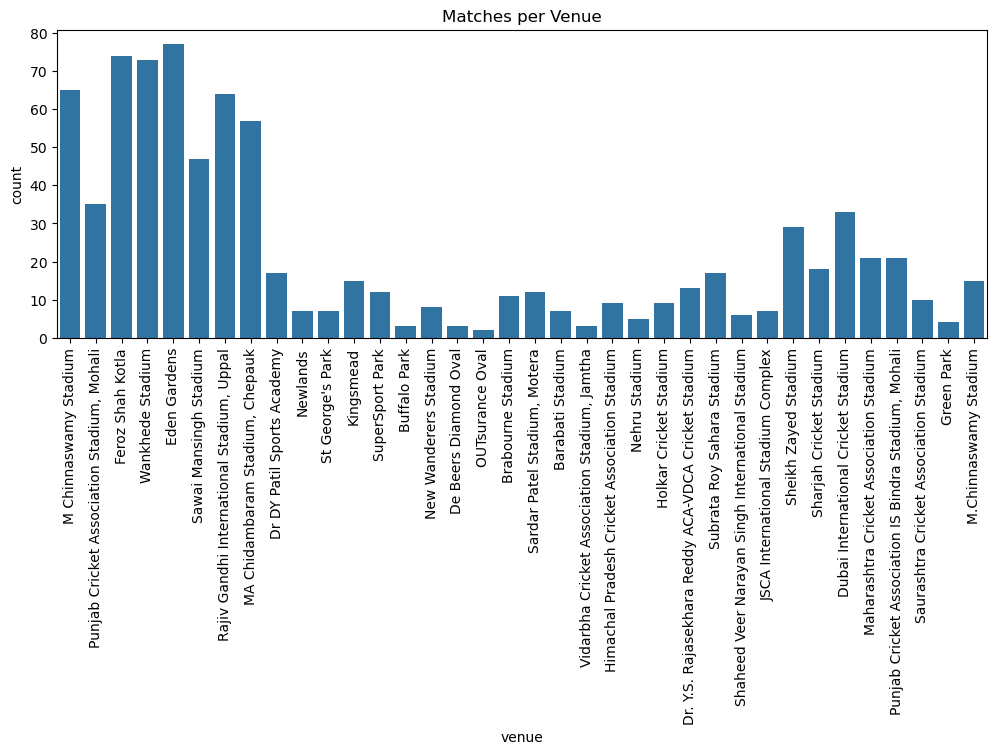

In [26]:
plt.figure(figsize=(12, 4))
sns.countplot(x='venue', data=matches)
plt.xticks(rotation=90)
plt.title('Matches per Venue')
plt.tight_layout()
plt.show()



In [27]:
team1_counts = matches['team1'].value_counts()


In [28]:
team2_counts = matches['team2'].value_counts()


In [29]:
total_matches = (team1_counts + team2_counts).sort_values(ascending=False)


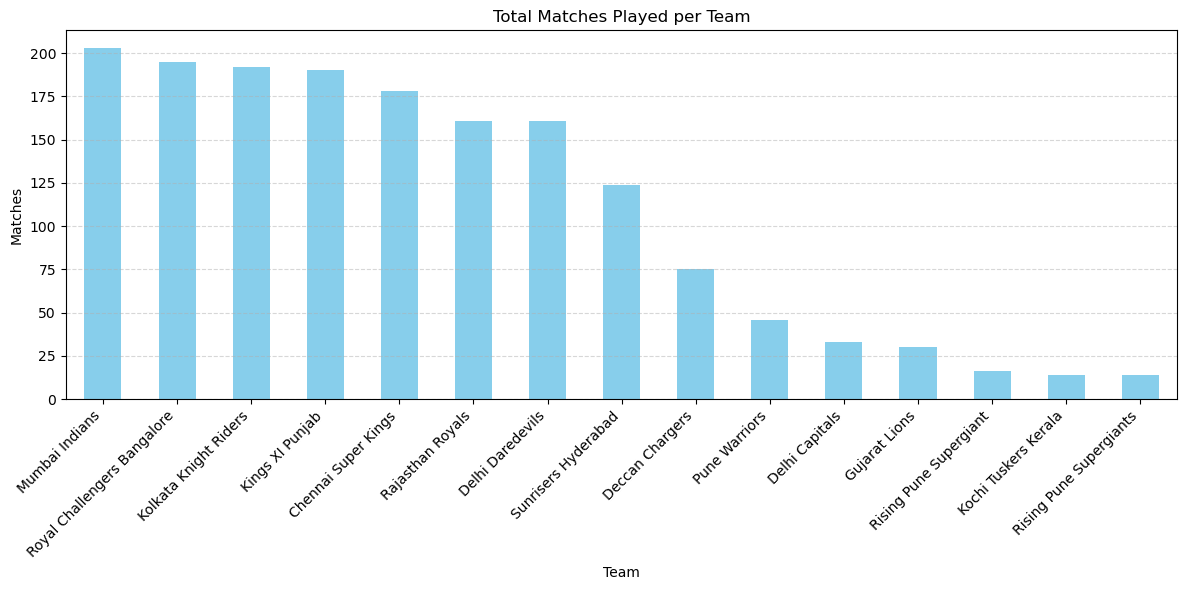

In [30]:
plt.figure(figsize=(12, 6))
total_matches.plot(kind='bar', color='skyblue')
plt.title('Total Matches Played per Team')
plt.xlabel('Team')
plt.ylabel('Matches')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\chinm\AppData\Local\Temp\ipykernel_23244\1231330636.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='winner', data=matches, palette='Set3')


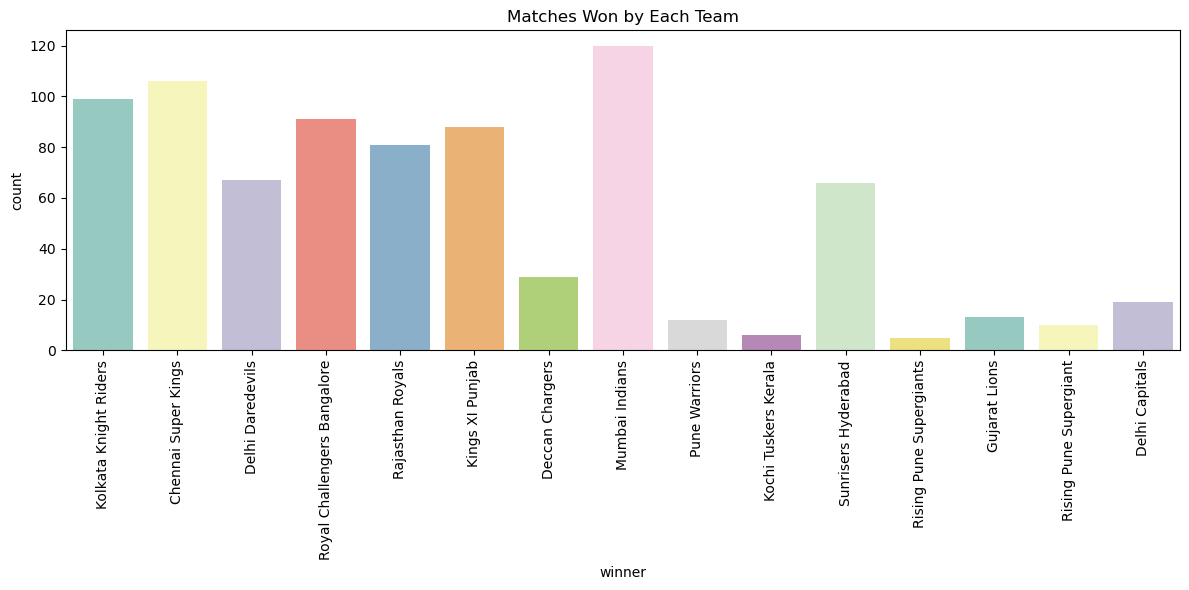

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(x='winner', data=matches, palette='Set3')
plt.xticks(rotation=90)
plt.title('Matches Won by Each Team')
plt.tight_layout()
plt.show()


C:\Users\chinm\AppData\Local\Temp\ipykernel_23244\4261151576.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='winner', data=elim, palette='pastel')


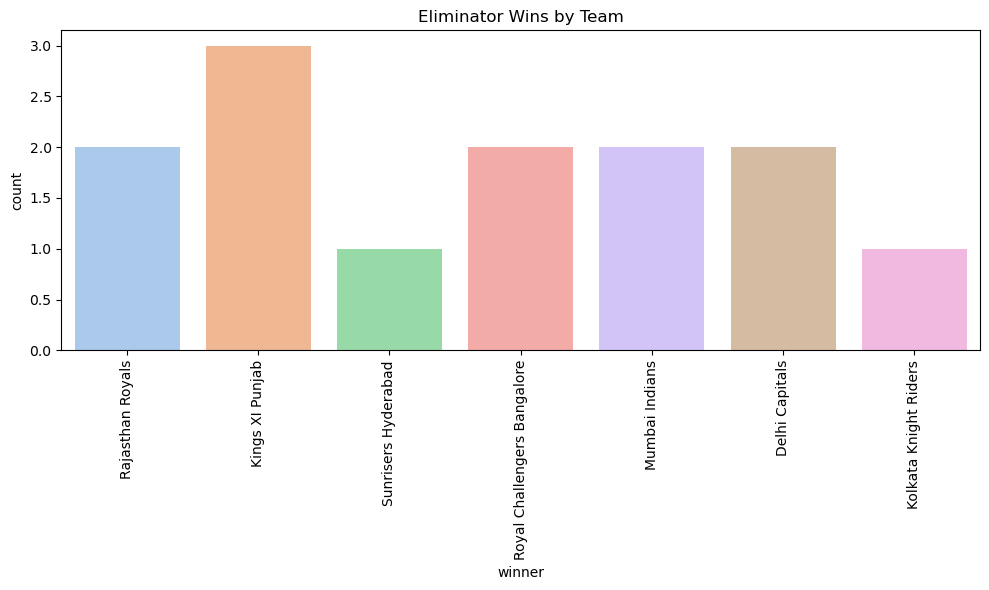

In [32]:
elim = matches[matches['eliminator'] == 'Y']
plt.figure(figsize=(10, 6))
sns.countplot(x='winner', data=elim, palette='pastel')
plt.xticks(rotation=90)
plt.title('Eliminator Wins by Team')
plt.tight_layout()
plt.show()



C:\Users\chinm\AppData\Local\Temp\ipykernel_23244\1500266808.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pom.index, y=pom.values, palette='viridis')


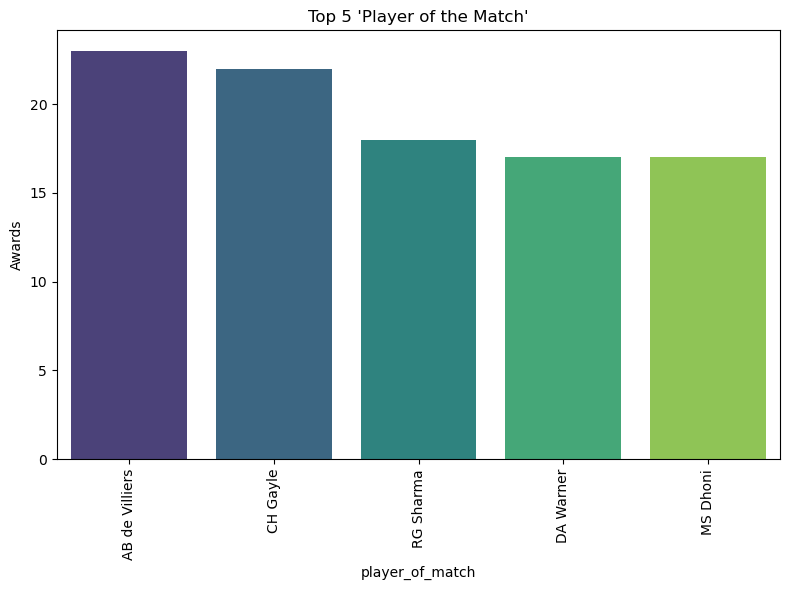

In [33]:
pom = matches['player_of_match'].value_counts().head(5)
plt.figure(figsize=(8, 6))
sns.barplot(x=pom.index, y=pom.values, palette='viridis')
plt.xticks(rotation=90)
plt.title("Top 5 'Player of the Match'")
plt.ylabel('Awards')
plt.tight_layout()
plt.show()



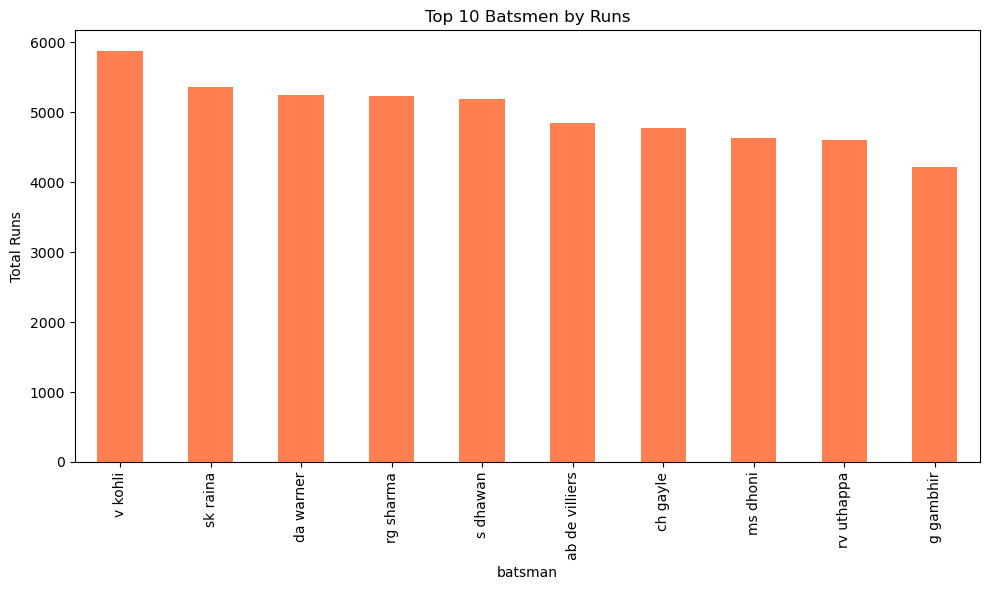

In [34]:
top_bats = deliveries.groupby('batsman')['batsman_runs'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_bats.plot(kind='bar', color='coral')
plt.xticks(rotation=90)
plt.title('Top 10 Batsmen by Runs')
plt.ylabel('Total Runs')
plt.tight_layout()
plt.show()



C:\Users\chinm\AppData\Local\Temp\ipykernel_23244\123942858.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sixes.index, y=sixes.values, palette='Oranges')


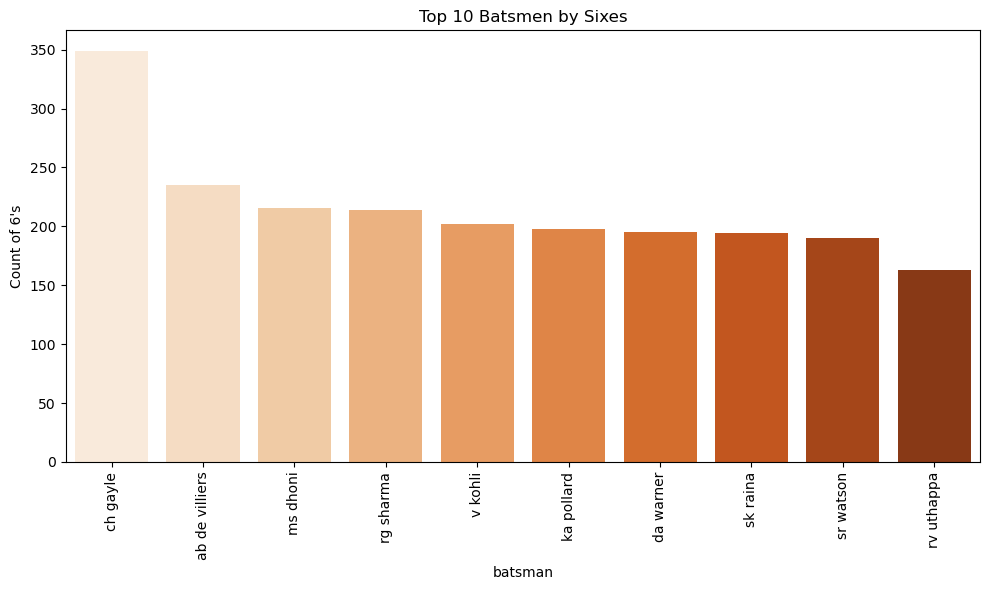

In [35]:
sixes = (deliveries.groupby('batsman')['batsman_runs']
          .apply(lambda x: (x == 6).sum())
          .nlargest(10))
plt.figure(figsize=(10, 6))
sns.barplot(x=sixes.index, y=sixes.values, palette='Oranges')
plt.xticks(rotation=90)
plt.title('Top 10 Batsmen by Sixes')
plt.ylabel("Count of 6's")
plt.tight_layout()
plt.show()

